In [1]:
import glob
from PIL import Image
import pathlib
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import *
import matplotlib.pyplot as plt

In [2]:
smile = glob.glob("positives/*.jpg")
no_smile = glob.glob("negatives/*.jpg")

In [3]:
images=[]
labels=[]

for image in smile:
    image = load_img(image, target_size=(32,32), color_mode='grayscale')
    image = img_to_array(image)
    label = 1 
    label = float(label)
    images.append(image)
    labels.append(label)
    
for image in no_smile:
    image = load_img(image, target_size=(32,32), color_mode='grayscale')
    image = img_to_array(image)
    label = 0
    label = float(label)
    images.append(image)
    labels.append(label)

In [4]:
X = np.array(images)
y = np.array(labels)

In [5]:
X.shape

(13165, 32, 32, 1)

In [6]:
y.shape

(13165,)

In [7]:
X /= 255.0
total = len(y)
total_positive = np.sum(y)
total_negative = total - total_positive

In [8]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2,stratify=y, random_state=999)

In [9]:
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=999)

In [10]:
input_layer = Input(shape=(32, 32, 1))
x = Conv2D(filters=20,kernel_size=(5, 5), padding='same', strides=(1, 1))(input_layer)
x = ELU()(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = Dropout(0.4)(x)
x = Conv2D(filters=50, kernel_size=(5, 5), padding='same', strides=(1, 1))(x)
x = ELU()(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(units=500)(x)
x = ELU()(x)
x = Dropout(0.4)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_layer, outputs=output)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 20)        520       
                                                                 
 elu (ELU)                   (None, 32, 32, 20)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 20)       80        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 20)        0     

In [12]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32,
         class_weight={ 1.0: total / total_positive, 0.0: total / total_negative})

Epoch 1/20
211/211 [==============================] - 10s 43ms/step - loss: 2.0122 - accuracy: 0.7308 - val_loss: 0.6653 - val_accuracy: 0.7579
Epoch 2/20
211/211 [==============================] - 9s 44ms/step - loss: 0.9465 - accuracy: 0.8169 - val_loss: 0.4036 - val_accuracy: 0.8676
Epoch 3/20
211/211 [==============================] - 9s 44ms/step - loss: 0.7944 - accuracy: 0.8461 - val_loss: 0.3810 - val_accuracy: 0.8391
Epoch 4/20
211/211 [==============================] - 9s 45ms/step - loss: 0.7443 - accuracy: 0.8588 - val_loss: 0.3442 - val_accuracy: 0.8614
Epoch 5/20
211/211 [==============================] - 9s 44ms/step - loss: 0.6626 - accuracy: 0.8692 - val_loss: 0.2661 - val_accuracy: 0.8946
Epoch 6/20
211/211 [==============================] - 9s 44ms/step - loss: 0.6143 - accuracy: 0.8788 - val_loss: 0.2850 - val_accuracy: 0.8927
Epoch 7/20
211/211 [==============================] - 9s 45ms/step - loss: 0.5735 - accuracy: 0.8884 - val_loss: 0.3858 - val_accuracy: 0.835

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

83/83 [==============================] - 1s 9ms/step - loss: 0.2467 - accuracy: 0.9206


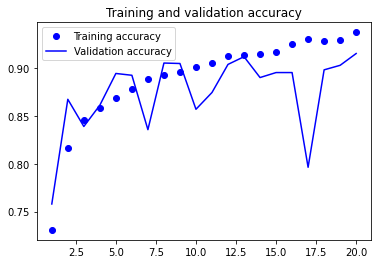

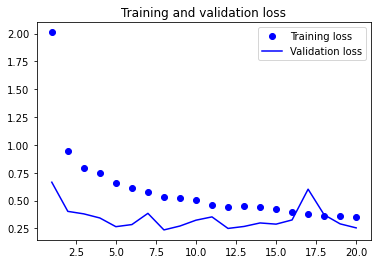

In [15]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()